In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [15]:
df = pd.read_csv('C:/Users/Admin/Desktop/P14-Machine-Learning-AZ/Projects/@IBM_Cognitive_Class/Tensor Flow/1TF - Linear_Regression/FuelConsumptionCo2.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [18]:
df.shape

(1067, 13)

In [22]:
#use linear regression to predict Co2Emission of cars based
#on their engine size. So, lets define X and Y value for the
#linear regression

In [23]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [24]:
#initialize the variables a and b, with any random guess

a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

In [25]:
# Now, define a loss function for our regression, so we can
# train our model to better fit our data. 

# In a linear regression, we minimize the squared error of 
# the difference between the predicted values(obtained from 
# the equation) and the target values (the data that we have)

In [26]:
# To find value of our loss, we use tf.reduce_mean(). This 
# function finds the mean of a multidimensional tensor, and 
# the result can have a different dimension

In [27]:
loss = tf.reduce_mean(tf.square(y - train_y))

In [41]:
#Then, we define the optimizer method

optimizer = tf.train.GradientDescentOptimizer(0.05)

AttributeError: module 'tensorflow_core._api.v2.train' has no attribute 'GradientDescentOptimizer'

In [42]:
#use the .minimize() which will minimize the error function
#of our optimizer, resulting in a better mode

train = optimizer.minimize(loss)

NameError: name 'optimizer' is not defined

In [43]:
#initialize the variables before executing a graph

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

AttributeError: module 'tensorflow' has no attribute 'global_variables_initializer'

In [44]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

NameError: name 'sess' is not defined

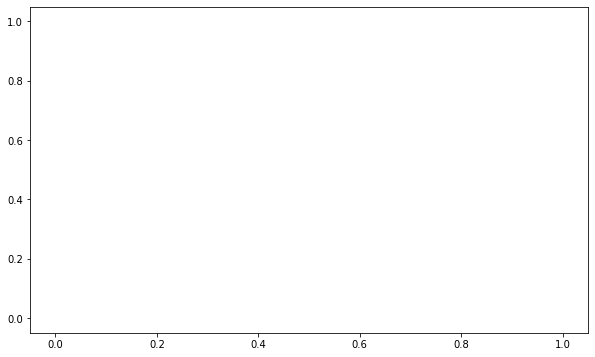

In [45]:
plt.plot(loss_values, 'ro')

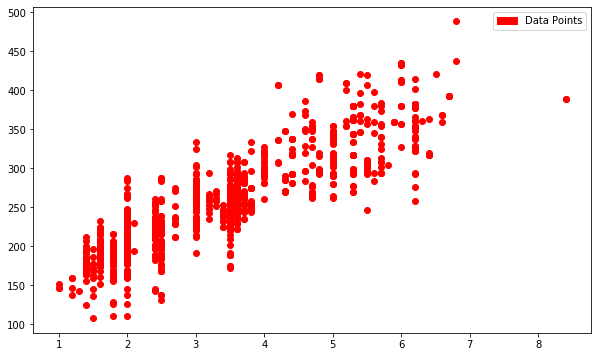

In [46]:
#visualize the coefficient and intercept

cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()